# Problem Statement: Develop a machine learning model that can predict whether the given customer would churn in the near future or not. customer data set is given.



As we can see that is a Classification Problem

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("BankCustomerChurn.csv")

# Data reading and Exploration

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Checking null Values

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Checking if any duplicates are present

In [7]:
data.CustomerId.nunique()

10000

In [8]:
data.shape

(10000, 14)

In [9]:
data.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
x=data.columns
x

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Data Visualizations

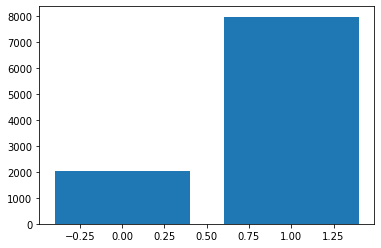

In [11]:
plt.bar(data['Exited'].unique(),data['Exited'].value_counts())
plt.show()

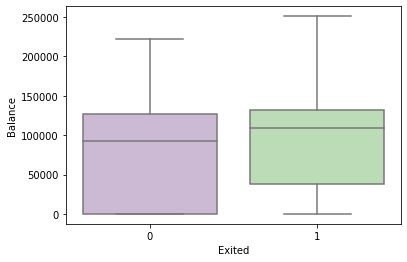

In [12]:
# Plotting Numeric VS Categorical Data
sns.boxplot(x="Exited", y="Balance", data=data, palette="PRGn")
plt.show()

## Type Casting

In [13]:
ins=[]
for col in data.columns:
  if data[col].nunique() <10:
    data[col]=data[col].astype('category')
    print(col,data[col].nunique())
    print(data[col].unique())





Geography 3
[France, Spain, Germany]
Categories (3, object): [France, Spain, Germany]
Gender 2
[Female, Male]
Categories (2, object): [Female, Male]
NumOfProducts 4
[1, 3, 2, 4]
Categories (4, int64): [1, 3, 2, 4]
HasCrCard 2
[1, 0]
Categories (2, int64): [1, 0]
IsActiveMember 2
[1, 0]
Categories (2, int64): [1, 0]
Exited 2
[1, 0]
Categories (2, int64): [1, 0]


In [14]:
data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [15]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [16]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,-0.005988
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.015271
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,1.000000


## **Data** **preparation**

Dependent and Independent variables

In [17]:
x=data.iloc[:,3:13]
print(x.shape)
print(data.shape)
x.head(5)

(10000, 10)
(10000, 14)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
y=data.loc[:,'Exited']
print(y.shape)
y.head()

(10000,)


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: category
Categories (2, int64): [0, 1]

In [19]:
x1=pd.get_dummies(x)
print(x1.shape)
x1.head()

(10000, 18)


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,1,1,0,1,0,0,0,0,1,0,1


# Model Building

### Train , Test split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=130)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 18)
(3000, 18)
(7000,)
(3000,)


## Using Decision Tree Classifier

In [22]:
tree=DecisionTreeClassifier(max_depth=15,max_features='sqrt',min_samples_leaf=20,min_samples_split=20)
tree=tree.fit(x_train,y_train)
pred=tree.predict(x_train)

In [23]:
print(y_train.shape)
print(pred.shape)



(7000,)
(7000,)


In [24]:
res=pd.DataFrame({'Actual':y_train,'Predicted':pred})
res

,Actual,Predicted
303,0,0
7031,1,0
8288,0,0
2782,0,0
1486,0,0
...,...,...
7690,0,0
9459,0,0
7965,1,0
7285,0,0


## **Evaluating**

In [25]:
print(confusion_matrix(y_train,pred))
print(accuracy_score(y_train,pred))
 

[[5377  211]
 [ 763  649]]
0.8608571428571429


In [26]:
preds=tree.predict(x_test)
print(confusion_matrix(y_test,preds))
print(accuracy_score(y_test,preds))

[[2262  113]
 [ 365  260]]
0.8406666666666667


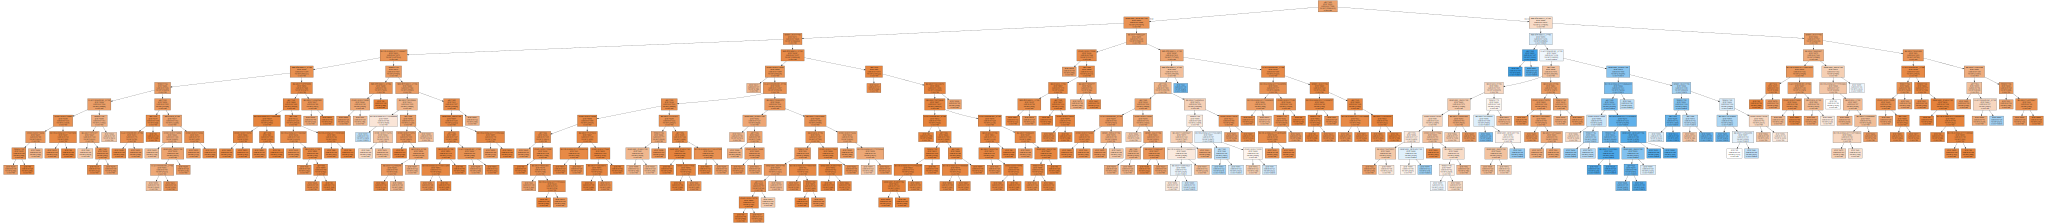

In [27]:
import graphviz
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(tree,out_file=None,feature_names=x1.columns,class_names=['no','churn'],filled=True))

### DTC with criterion 'entropy'

In [28]:
tree1=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=20,min_samples_split=20)
tree1=tree1.fit(x_train,y_train)


In [29]:
pred1=tree1.predict(x_train)
print("confusion_matrix of train data")
print(confusion_matrix(y_train,pred1))
print("accuracy_score of train data",accuracy_score(y_train,pred1))

preds1=tree1.predict(x_test)
print("confusion_matrix of test data")
print(confusion_matrix(y_test,preds1))
print("accuracy_score of test data",accuracy_score(y_test,preds1))

confusion_matrix of train data
[[5271  317]
 [ 712  700]]
accuracy_score of train data 0.853
confusion_matrix of test data
[[2214  161]
 [ 363  262]]
accuracy_score of test data 0.8253333333333334


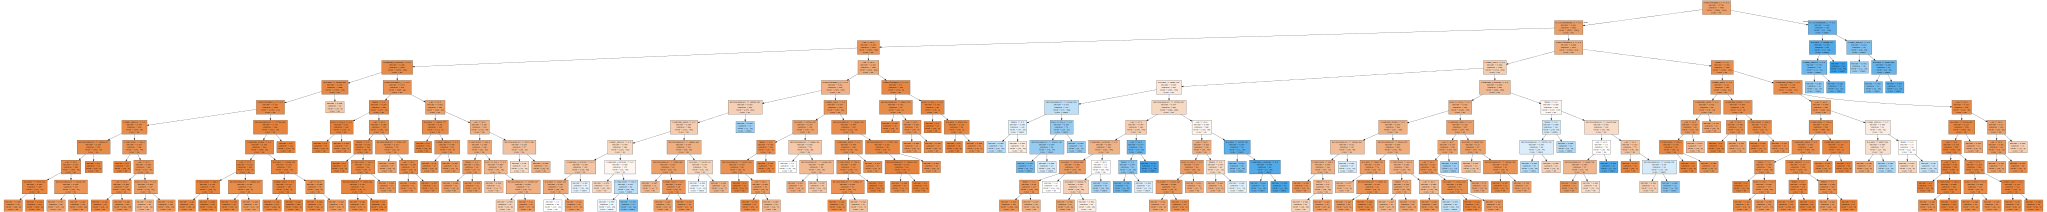

In [30]:
graphviz.Source(export_graphviz(tree1,out_file=None,feature_names=x1.columns,class_names=['no','churn'],filled=True))

NumOfProducts_3 <= 0.5 and for Age <= 42.5 almost everyone has churned.

Geography_Germany <= 0.5  and IsActiveMember_1 <= 0.5  and HasCrCard_1 <= 0.5 almost everyone in that region has churuned.